### Edgar Moises Hernandez-Gonzalez
#### 07/11/19-01/04/20
#### Clasificar CIFAR10 con CNN con Batch Normalization
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 72.17%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPool2D, Flatten, Dense,
                                     BatchNormalization, Activation)
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)        0

In [0]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
391/391 - 3s - loss: 1.2811 - accuracy: 0.5468 - val_loss: 2.3202 - val_accuracy: 0.2881
Epoch 2/20
391/391 - 3s - loss: 0.9094 - accuracy: 0.6800 - val_loss: 1.9506 - val_accuracy: 0.4207
Epoch 3/20
391/391 - 3s - loss: 0.7596 - accuracy: 0.7349 - val_loss: 1.0964 - val_accuracy: 0.6211
Epoch 4/20
391/391 - 3s - loss: 0.6637 - accuracy: 0.7703 - val_loss: 1.0000 - val_accuracy: 0.6625
Epoch 5/20
391/391 - 3s - loss: 0.5864 - accuracy: 0.7945 - val_loss: 1.0306 - val_accuracy: 0.6578
Epoch 6/20
391/391 - 3s - loss: 0.5243 - accuracy: 0.8171 - val_loss: 1.1226 - val_accuracy: 0.6380
Epoch 7/20
391/391 - 3s - loss: 0.4669 - accuracy: 0.8381 - val_loss: 0.9719 - val_accuracy: 0.6917
Epoch 8/20
391/391 - 3s - loss: 0.4178 - accuracy: 0.8533 - val_loss: 1.2073 - val_accuracy: 0.6490
Epoch 9/20
391/391 - 3s - loss: 0.3751 - accuracy: 0.8687 - val_loss: 1.5556 - val_accuracy: 0.5839
Epoch 10/20
391/391 - 3s - loss: 0.3280 - accuracy: 0.8869 - val_loss: 1.1845 - val_accuracy: 0.6565

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.2742 - accuracy: 0.7217
Test loss: 1.2742034196853638
Test accuracy: 0.7217000126838684


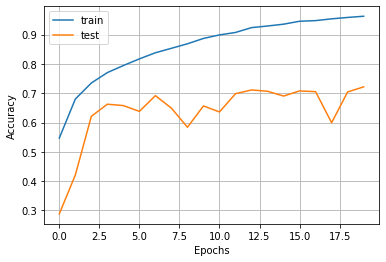

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

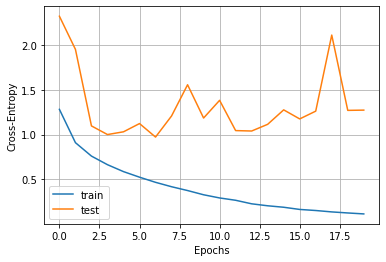

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [0]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[774  19  51  15  20   5   6  10  65  35]
 [ 25 813   6   6   6   3  12   6  26  97]
 [ 63   9 617  52  86  51  67  15  28  12]
 [ 29   8  77 473  84 160  72  24  44  29]
 [ 24   1  56  43 747  26  47  30  22   4]
 [  9   4  46 133  57 643  38  29  29  12]
 [  9   3  43  60  29  25 805   3  18   5]
 [ 23   8  46  33 100  71   3 670  17  29]
 [ 62  21   7   6   8   6   8   0 855  27]
 [ 31  59   8   7   8   5   5   5  52 820]]


In [0]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1000
           1       0.86      0.81      0.84      1000
           2       0.64      0.62      0.63      1000
           3       0.57      0.47      0.52      1000
           4       0.65      0.75      0.70      1000
           5       0.65      0.64      0.64      1000
           6       0.76      0.81      0.78      1000
           7       0.85      0.67      0.75      1000
           8       0.74      0.85      0.79      1000
           9       0.77      0.82      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [0]:
num_test = 28
print("Etiqueta verdadera", y_test[num_test])
prediccion = model.predict(x_test[num_test].reshape(1,32,32,3))
print("Etiqueta predicha", prediccion.argmax())

Etiqueta verdadera [9]
Etiqueta predicha 9


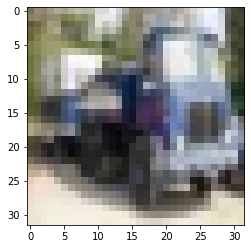

In [0]:
plt.imshow(x_test[num_test])
plt.show()